In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phone-usage-in-india/phone_usage_india.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading and reading data

In [4]:
df = pd.read_csv('/kaggle/input/phone-usage-in-india/phone_usage_india.csv')
df.head()

,User ID,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use
0,U00001,53,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education
1,U00002,60,Other,Delhi,Realme,iOS,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming
2,U00003,37,Female,Ahmedabad,Nokia,Android,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,Entertainment
3,U00004,32,Male,Pune,Samsung,Android,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,Entertainment
4,U00005,16,Male,Mumbai,Xiaomi,iOS,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,Social Media


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,17686.0,37.584247,13.338252,15.0,26.000,38.0,49.00,60.0
Screen Time (hrs/day),17686.0,6.546376,3.172677,1.0,3.800,6.6,9.30,12.0
Data Usage (GB/month),17686.0,25.411257,14.122167,1.0,13.200,25.3,37.60,50.0
Calls Duration (mins/day),17686.0,151.405846,84.923353,5.0,77.325,150.6,223.90,300.0
Number of Apps Installed,17686.0,104.584869,55.217097,10.0,57.000,104.0,152.00,200.0
Social Media Time (hrs/day),17686.0,3.252369,1.590223,0.5,1.900,3.2,4.60,6.0
E-commerce Spend (INR/month),17686.0,5075.707848,2871.604841,100.0,2587.500,5052.0,7606.00,10000.0
Streaming Time (hrs/day),17686.0,4.250616,2.155683,0.5,2.400,4.2,6.10,8.0
Gaming Time (hrs/day),17686.0,2.490874,1.446003,0.0,1.200,2.5,3.70,5.0
Monthly Recharge Cost (INR),17686.0,1042.785367,552.502067,100.0,561.000,1040.0,1521.75,2000.0


In [6]:
df.shape

(17686, 16)

In [7]:
df.isnull().sum()

User ID                         0
Age                             0
Gender                          0
Location                        0
Phone Brand                     0
OS                              0
Screen Time (hrs/day)           0
Data Usage (GB/month)           0
Calls Duration (mins/day)       0
Number of Apps Installed        0
Social Media Time (hrs/day)     0
E-commerce Spend (INR/month)    0
Streaming Time (hrs/day)        0
Gaming Time (hrs/day)           0
Monthly Recharge Cost (INR)     0
Primary Use                     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17686 entries, 0 to 17685
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User ID                       17686 non-null  object 
 1   Age                           17686 non-null  int64  
 2   Gender                        17686 non-null  object 
 3   Location                      17686 non-null  object 
 4   Phone Brand                   17686 non-null  object 
 5   OS                            17686 non-null  object 
 6   Screen Time (hrs/day)         17686 non-null  float64
 7   Data Usage (GB/month)         17686 non-null  float64
 8   Calls Duration (mins/day)     17686 non-null  float64
 9   Number of Apps Installed      17686 non-null  int64  
 10  Social Media Time (hrs/day)   17686 non-null  float64
 11  E-commerce Spend (INR/month)  17686 non-null  int64  
 12  Streaming Time (hrs/day)      17686 non-null  float64
 13  G

In [9]:
numeric_cols = df.select_dtypes(["integer", "float"])
numeric_cols

,Age,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR)
0,53,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803
1,60,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526
2,37,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619
3,32,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560
4,16,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742
...,...,...,...,...,...,...,...,...,...,...
17681,27,7.2,36.6,90.4,81,5.1,4007,3.8,3.3,1380
17682,40,9.5,12.9,243.0,166,4.3,8550,3.4,0.7,222
17683,34,1.1,48.9,74.7,70,5.3,5516,0.7,4.0,1612
17684,22,8.8,25.6,105.6,96,2.4,3614,6.6,0.8,1528


# Distribution of Numerical Data

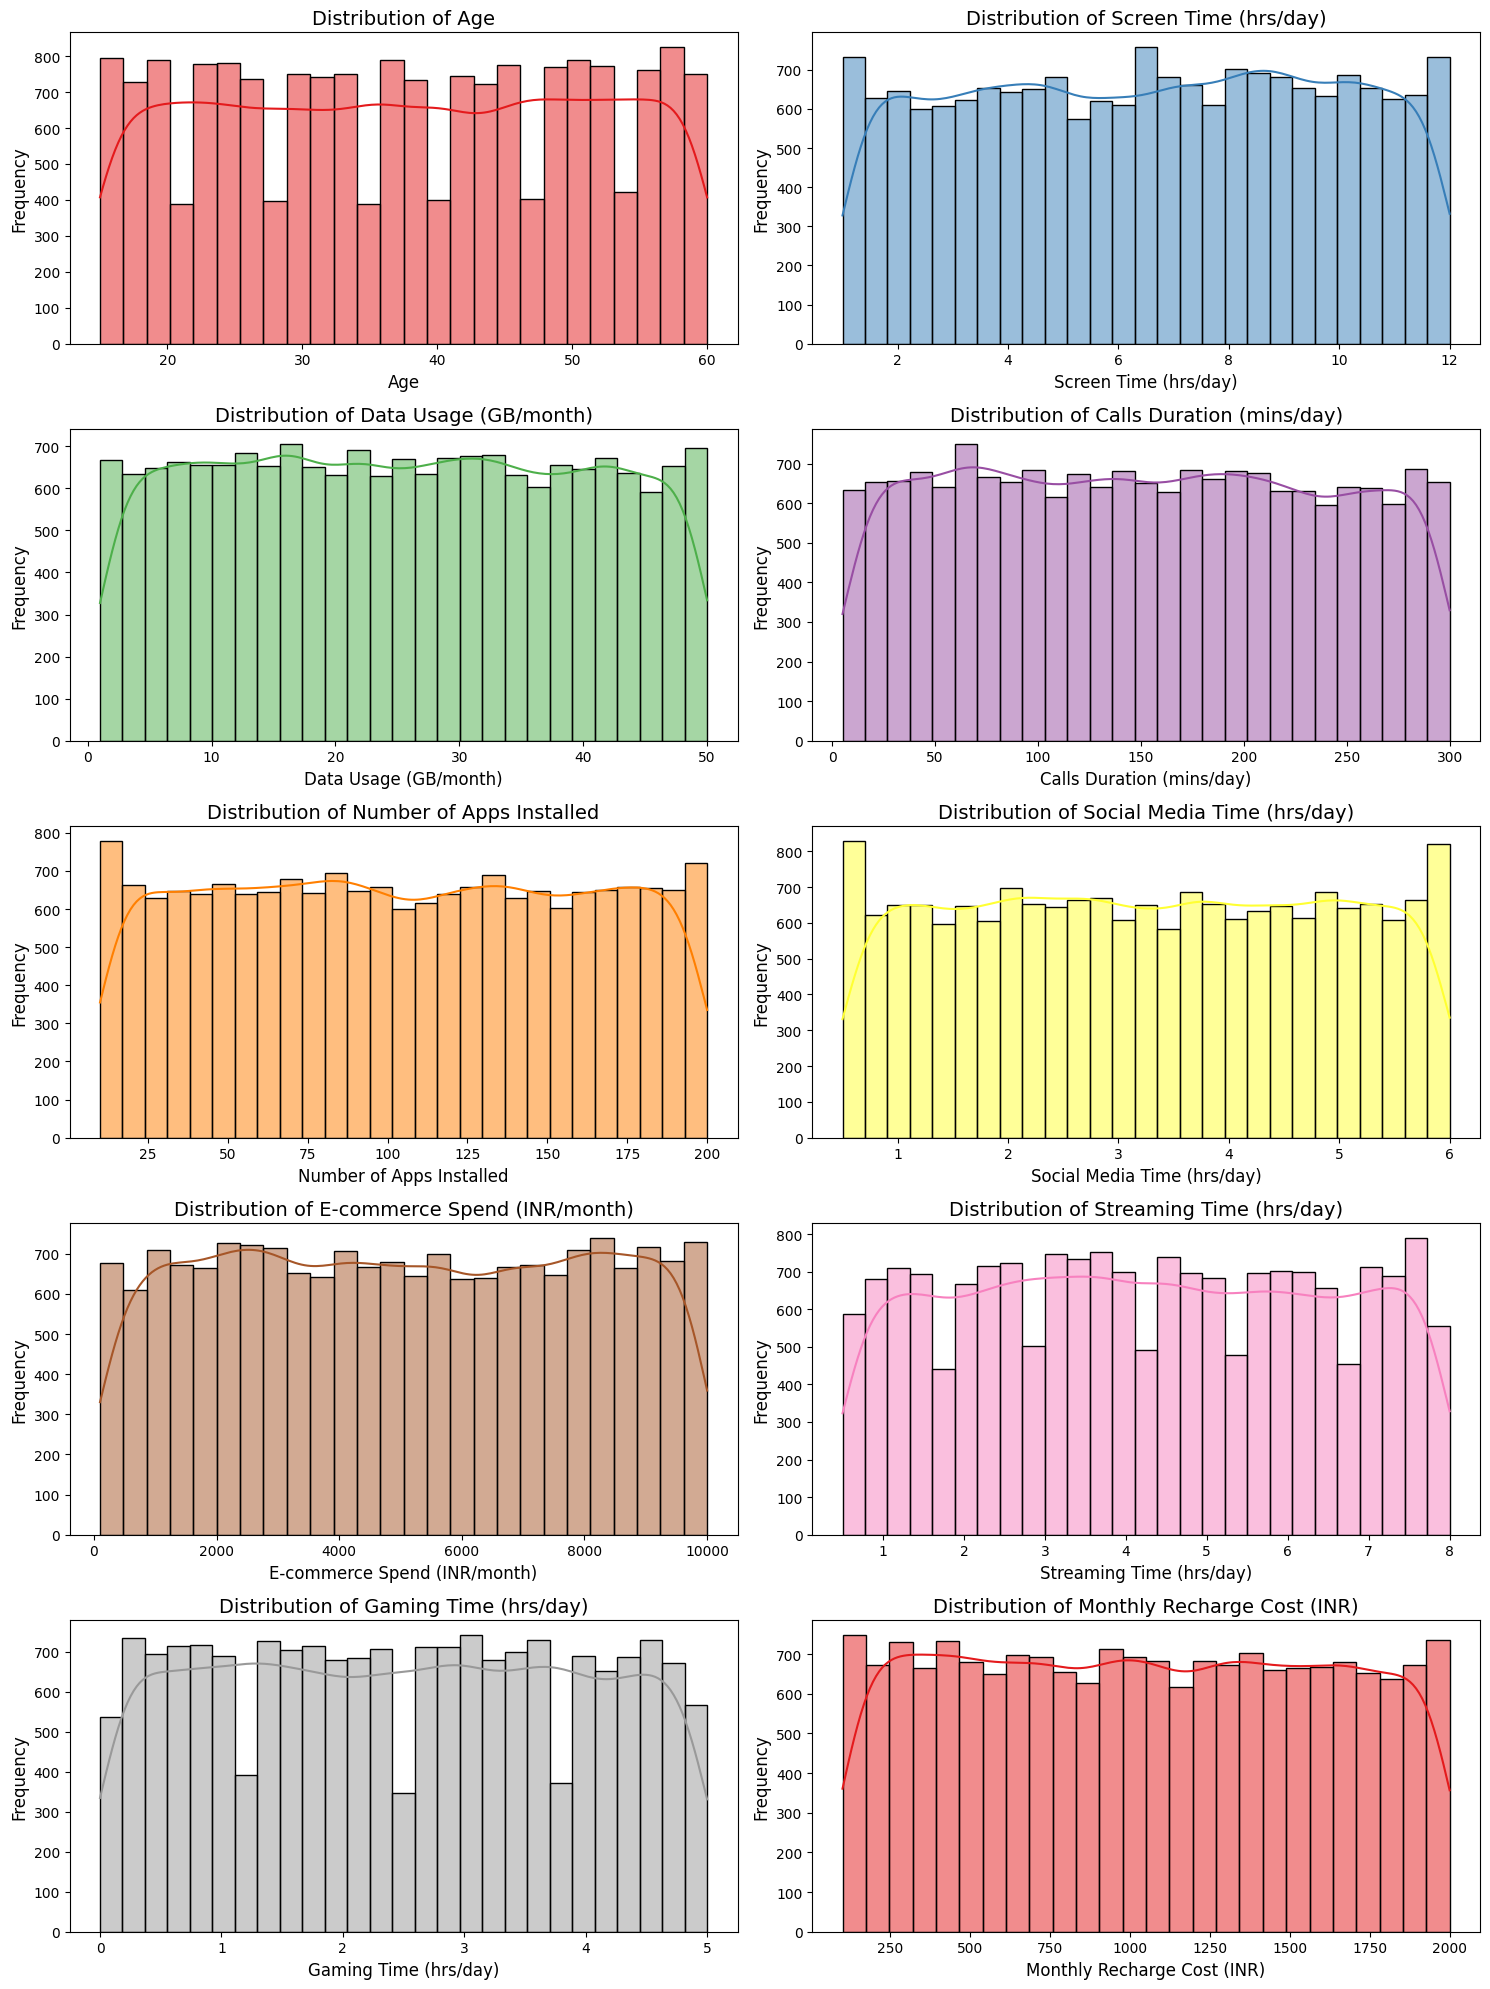

In [18]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = ax.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax = axes[i], color=sns.color_palette('Set1', len(numeric_cols))[i] )
    axes[i].set_title(f"Distribution of {col}", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()




In [20]:
numeric_cols_corr = numeric_cols.corr()
numeric_cols_corr

,Age,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR)
Age,1.000000,-0.010705,-0.007232,-0.007259,-0.009703,-0.011385,0.008763,0.009050,-0.002444,-0.006210
Screen Time (hrs/day),-0.010705,1.000000,0.000326,-0.015702,0.004704,-0.006306,-0.002506,-0.021748,-0.008709,-0.003222
Data Usage (GB/month),-0.007232,0.000326,1.000000,-0.001485,0.000425,0.006177,0.001390,0.004230,-0.008164,-0.008915
Calls Duration (mins/day),-0.007259,-0.015702,-0.001485,1.000000,0.009857,-0.006600,-0.008064,-0.002129,0.006766,-0.006916
Number of Apps Installed,-0.009703,0.004704,0.000425,0.009857,1.000000,-0.013602,-0.021916,-0.005857,-0.004102,0.001568
Social Media Time (hrs/day),-0.011385,-0.006306,0.006177,-0.006600,-0.013602,1.000000,-0.008244,-0.003571,-0.006567,-0.002897
E-commerce Spend (INR/month),0.008763,-0.002506,0.001390,-0.008064,-0.021916,-0.008244,1.000000,-0.006576,0.006581,0.003538
Streaming Time (hrs/day),0.009050,-0.021748,0.004230,-0.002129,-0.005857,-0.003571,-0.006576,1.000000,-0.002578,0.009488
Gaming Time (hrs/day),-0.002444,-0.008709,-0.008164,0.006766,-0.004102,-0.006567,0.006581,-0.002578,1.000000,-0.005990
Monthly Recharge Cost (INR),-0.006210,-0.003222,-0.008915,-0.006916,0.001568,-0.002897,0.003538,0.009488,-0.005990,1.000000


# Headmap for Data

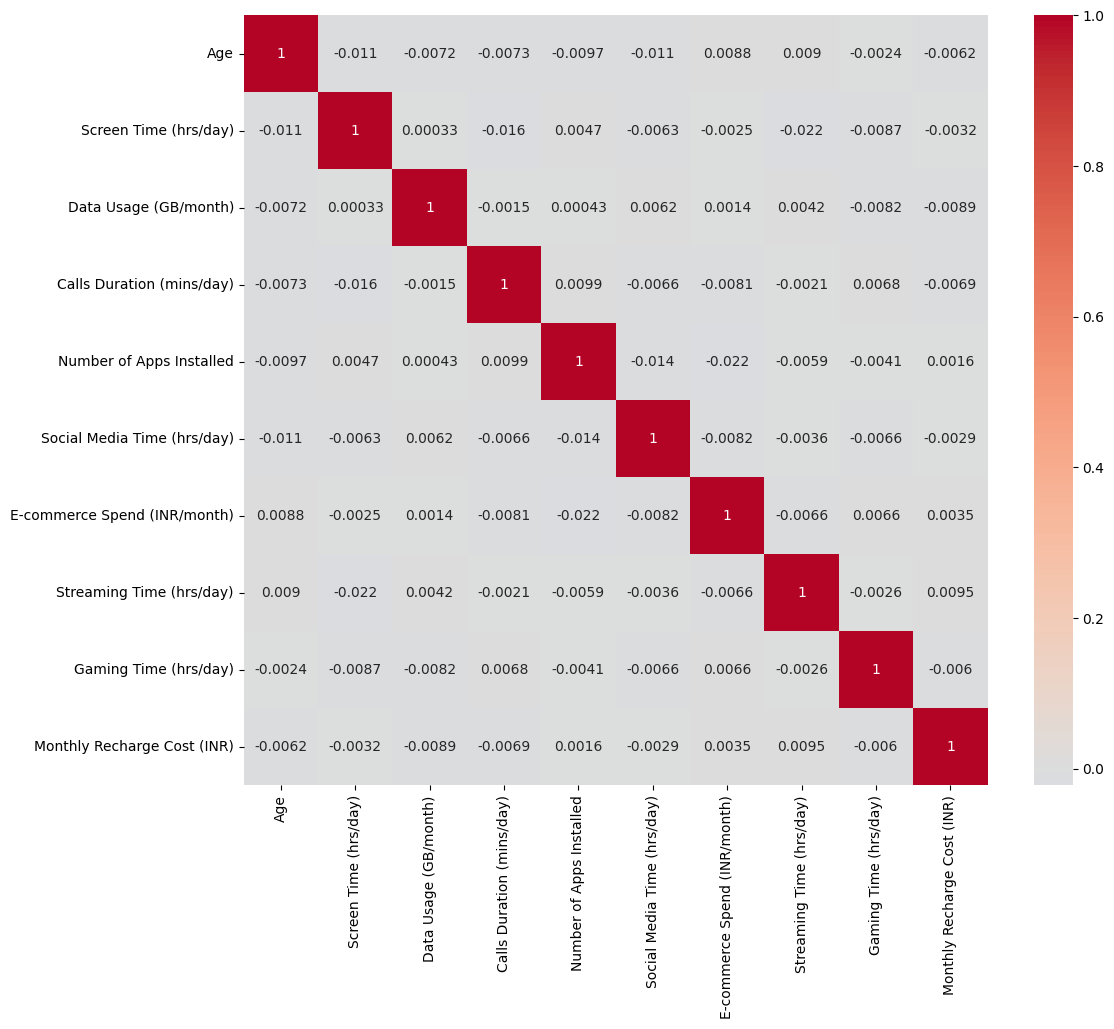

In [25]:
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_cols_corr, annot=True, cmap='coolwarm', center=0)
plt.show()

# Gender Distribution

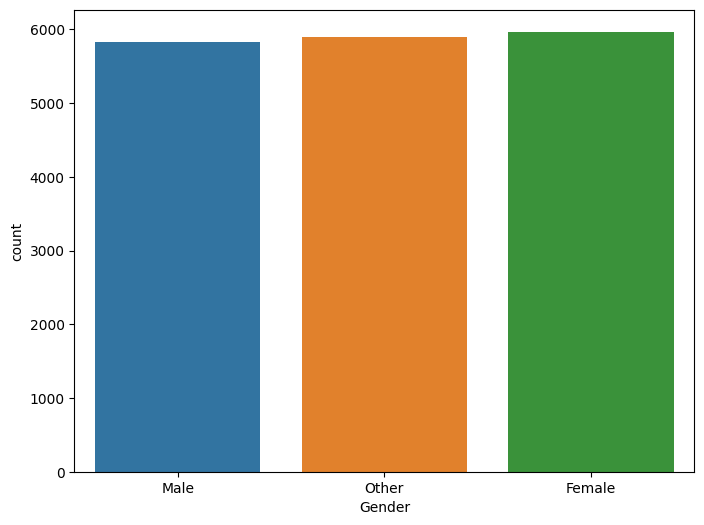

In [69]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender')
plt.show()

# Distribution of Data by Age Group

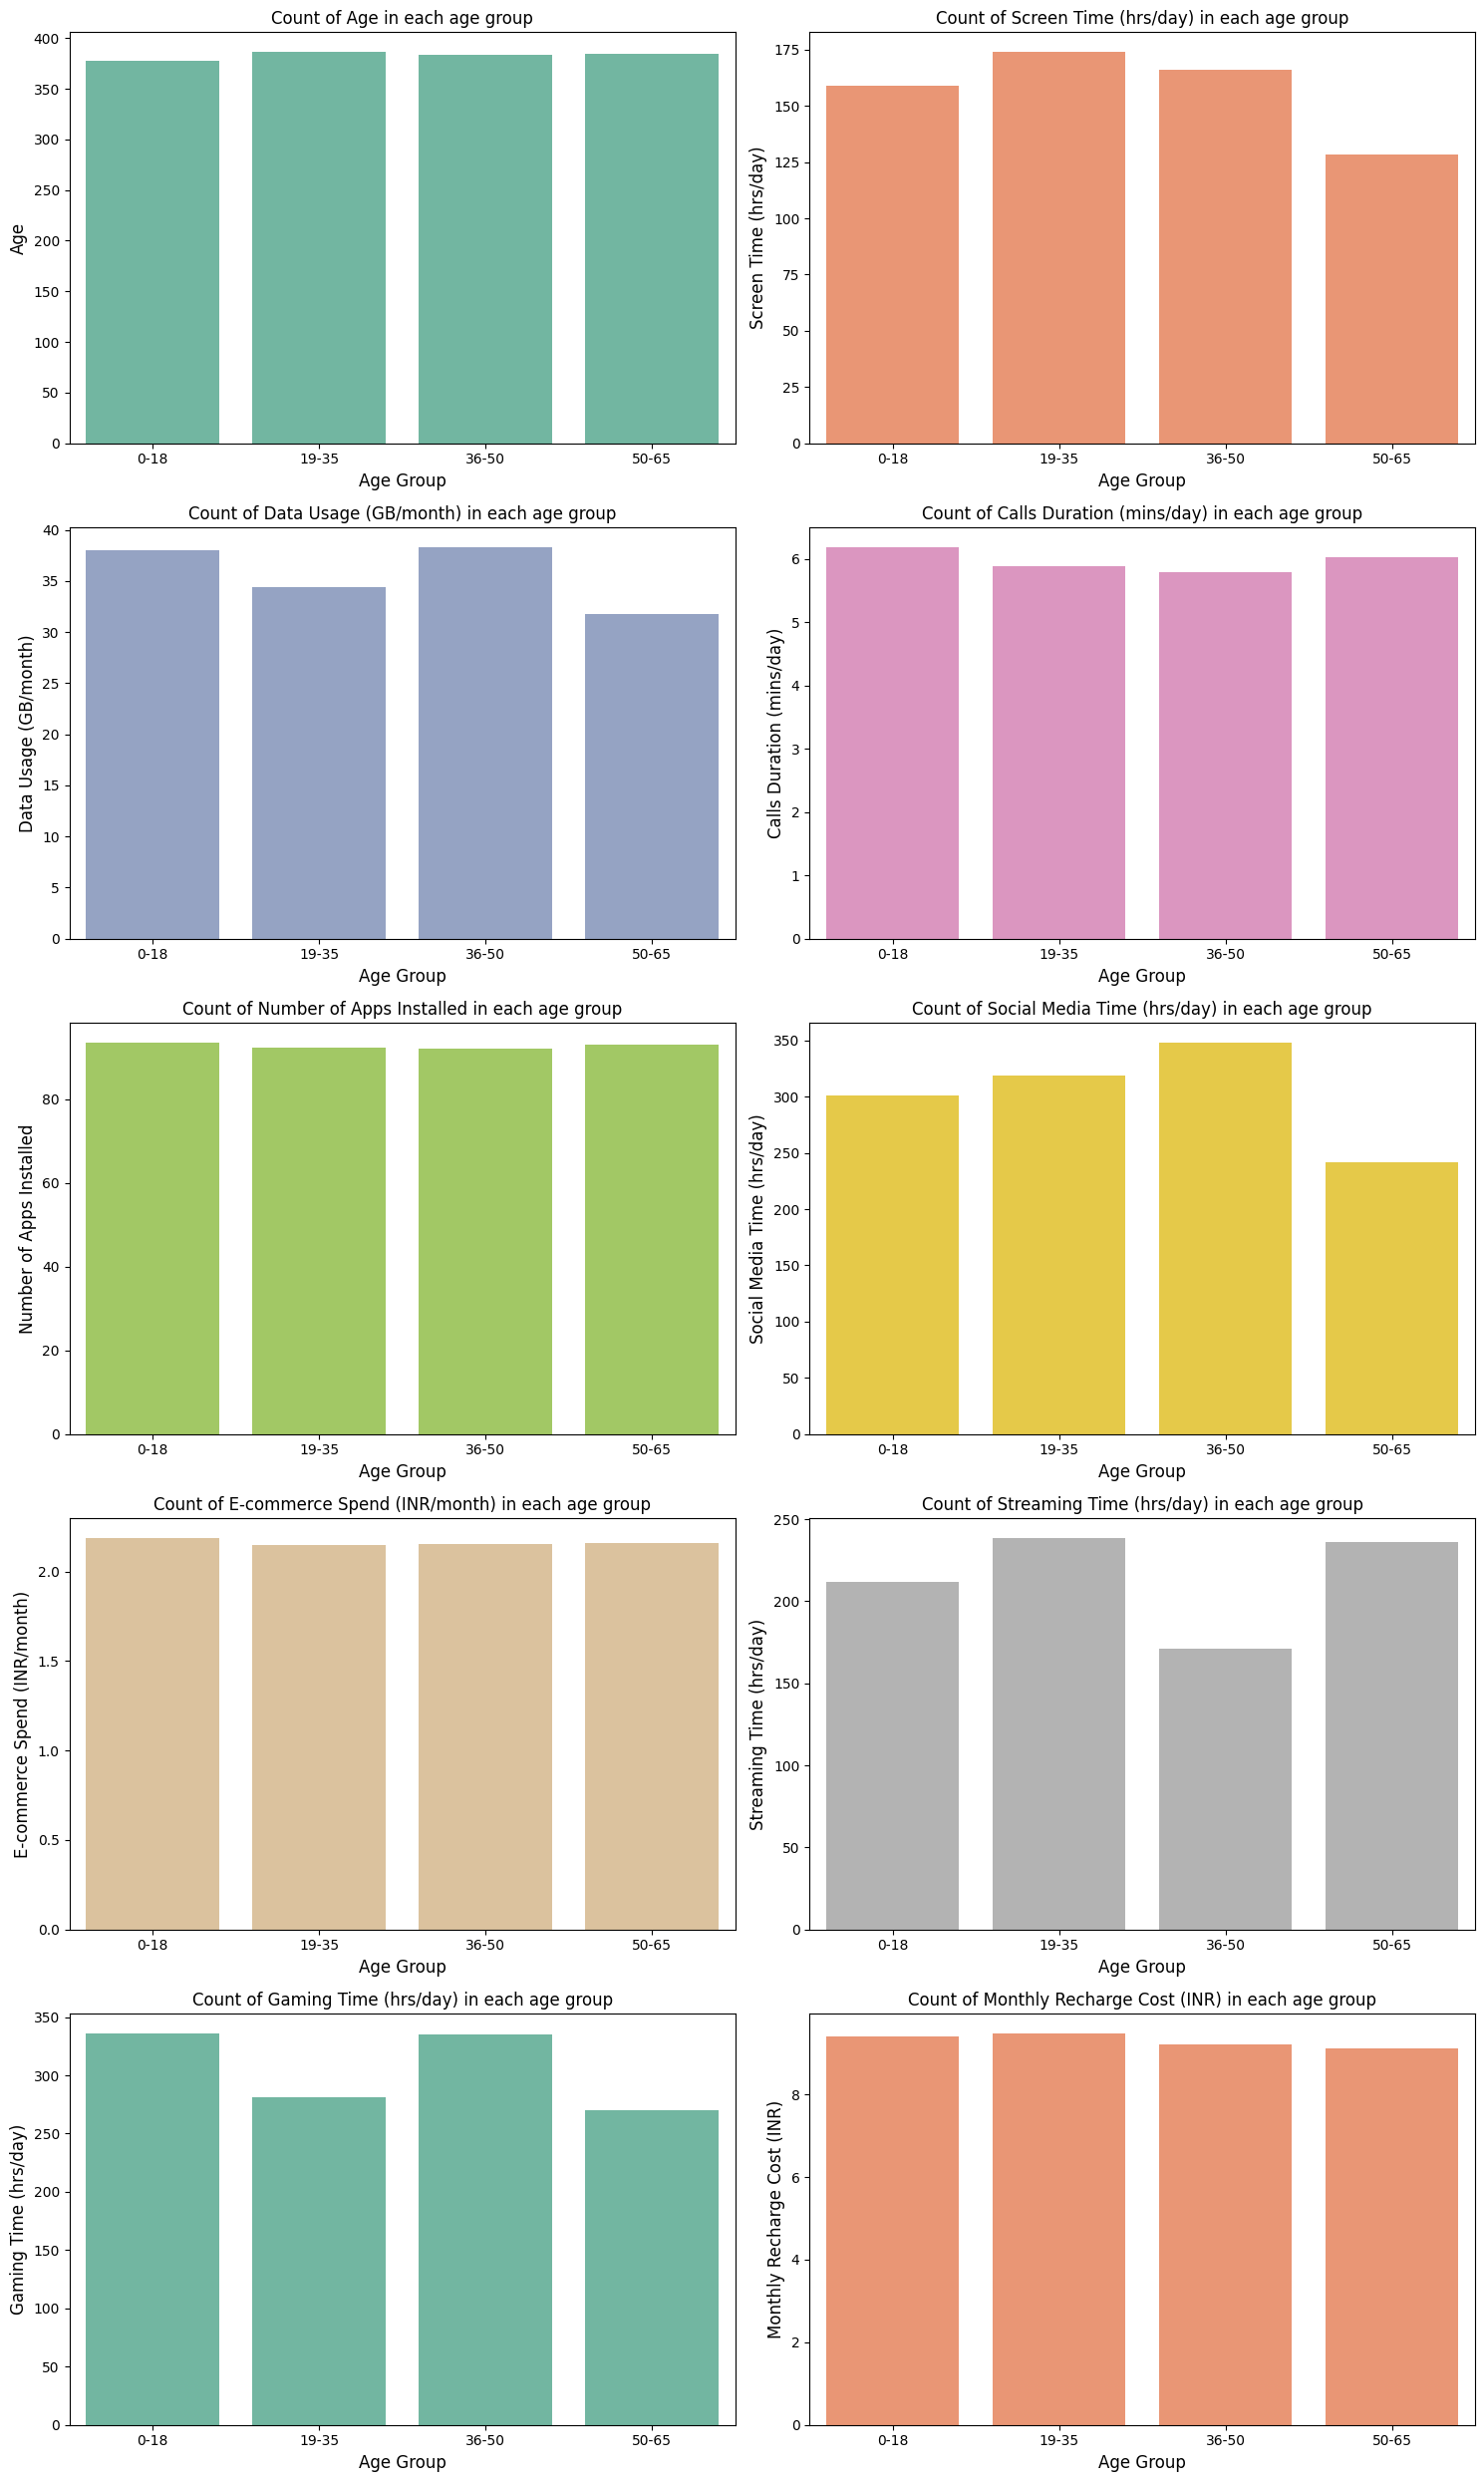

In [83]:
df['Age_group'] = pd.cut(df['Age'],bins=[0,18,35,50,65], labels=['0-18','19-35','36-50','50-65'])

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15,25))
axes= ax.flatten()

for i, cols in enumerate(numeric_cols):
    sns.barplot(x=df['Age_group'], y=df[cols].value_counts(), ci=None, ax=axes[i], color=sns.color_palette('Set2', len(numeric_cols))[i])
    axes[i].set_title(f"Count of {cols} in each age group")
    axes[i].set_xlabel('Age Group', fontsize=12)
    axes[i].set_ylabel(cols, fontsize=12)
plt.tight_layout()    
plt.show()

# Distribution of data by Gender

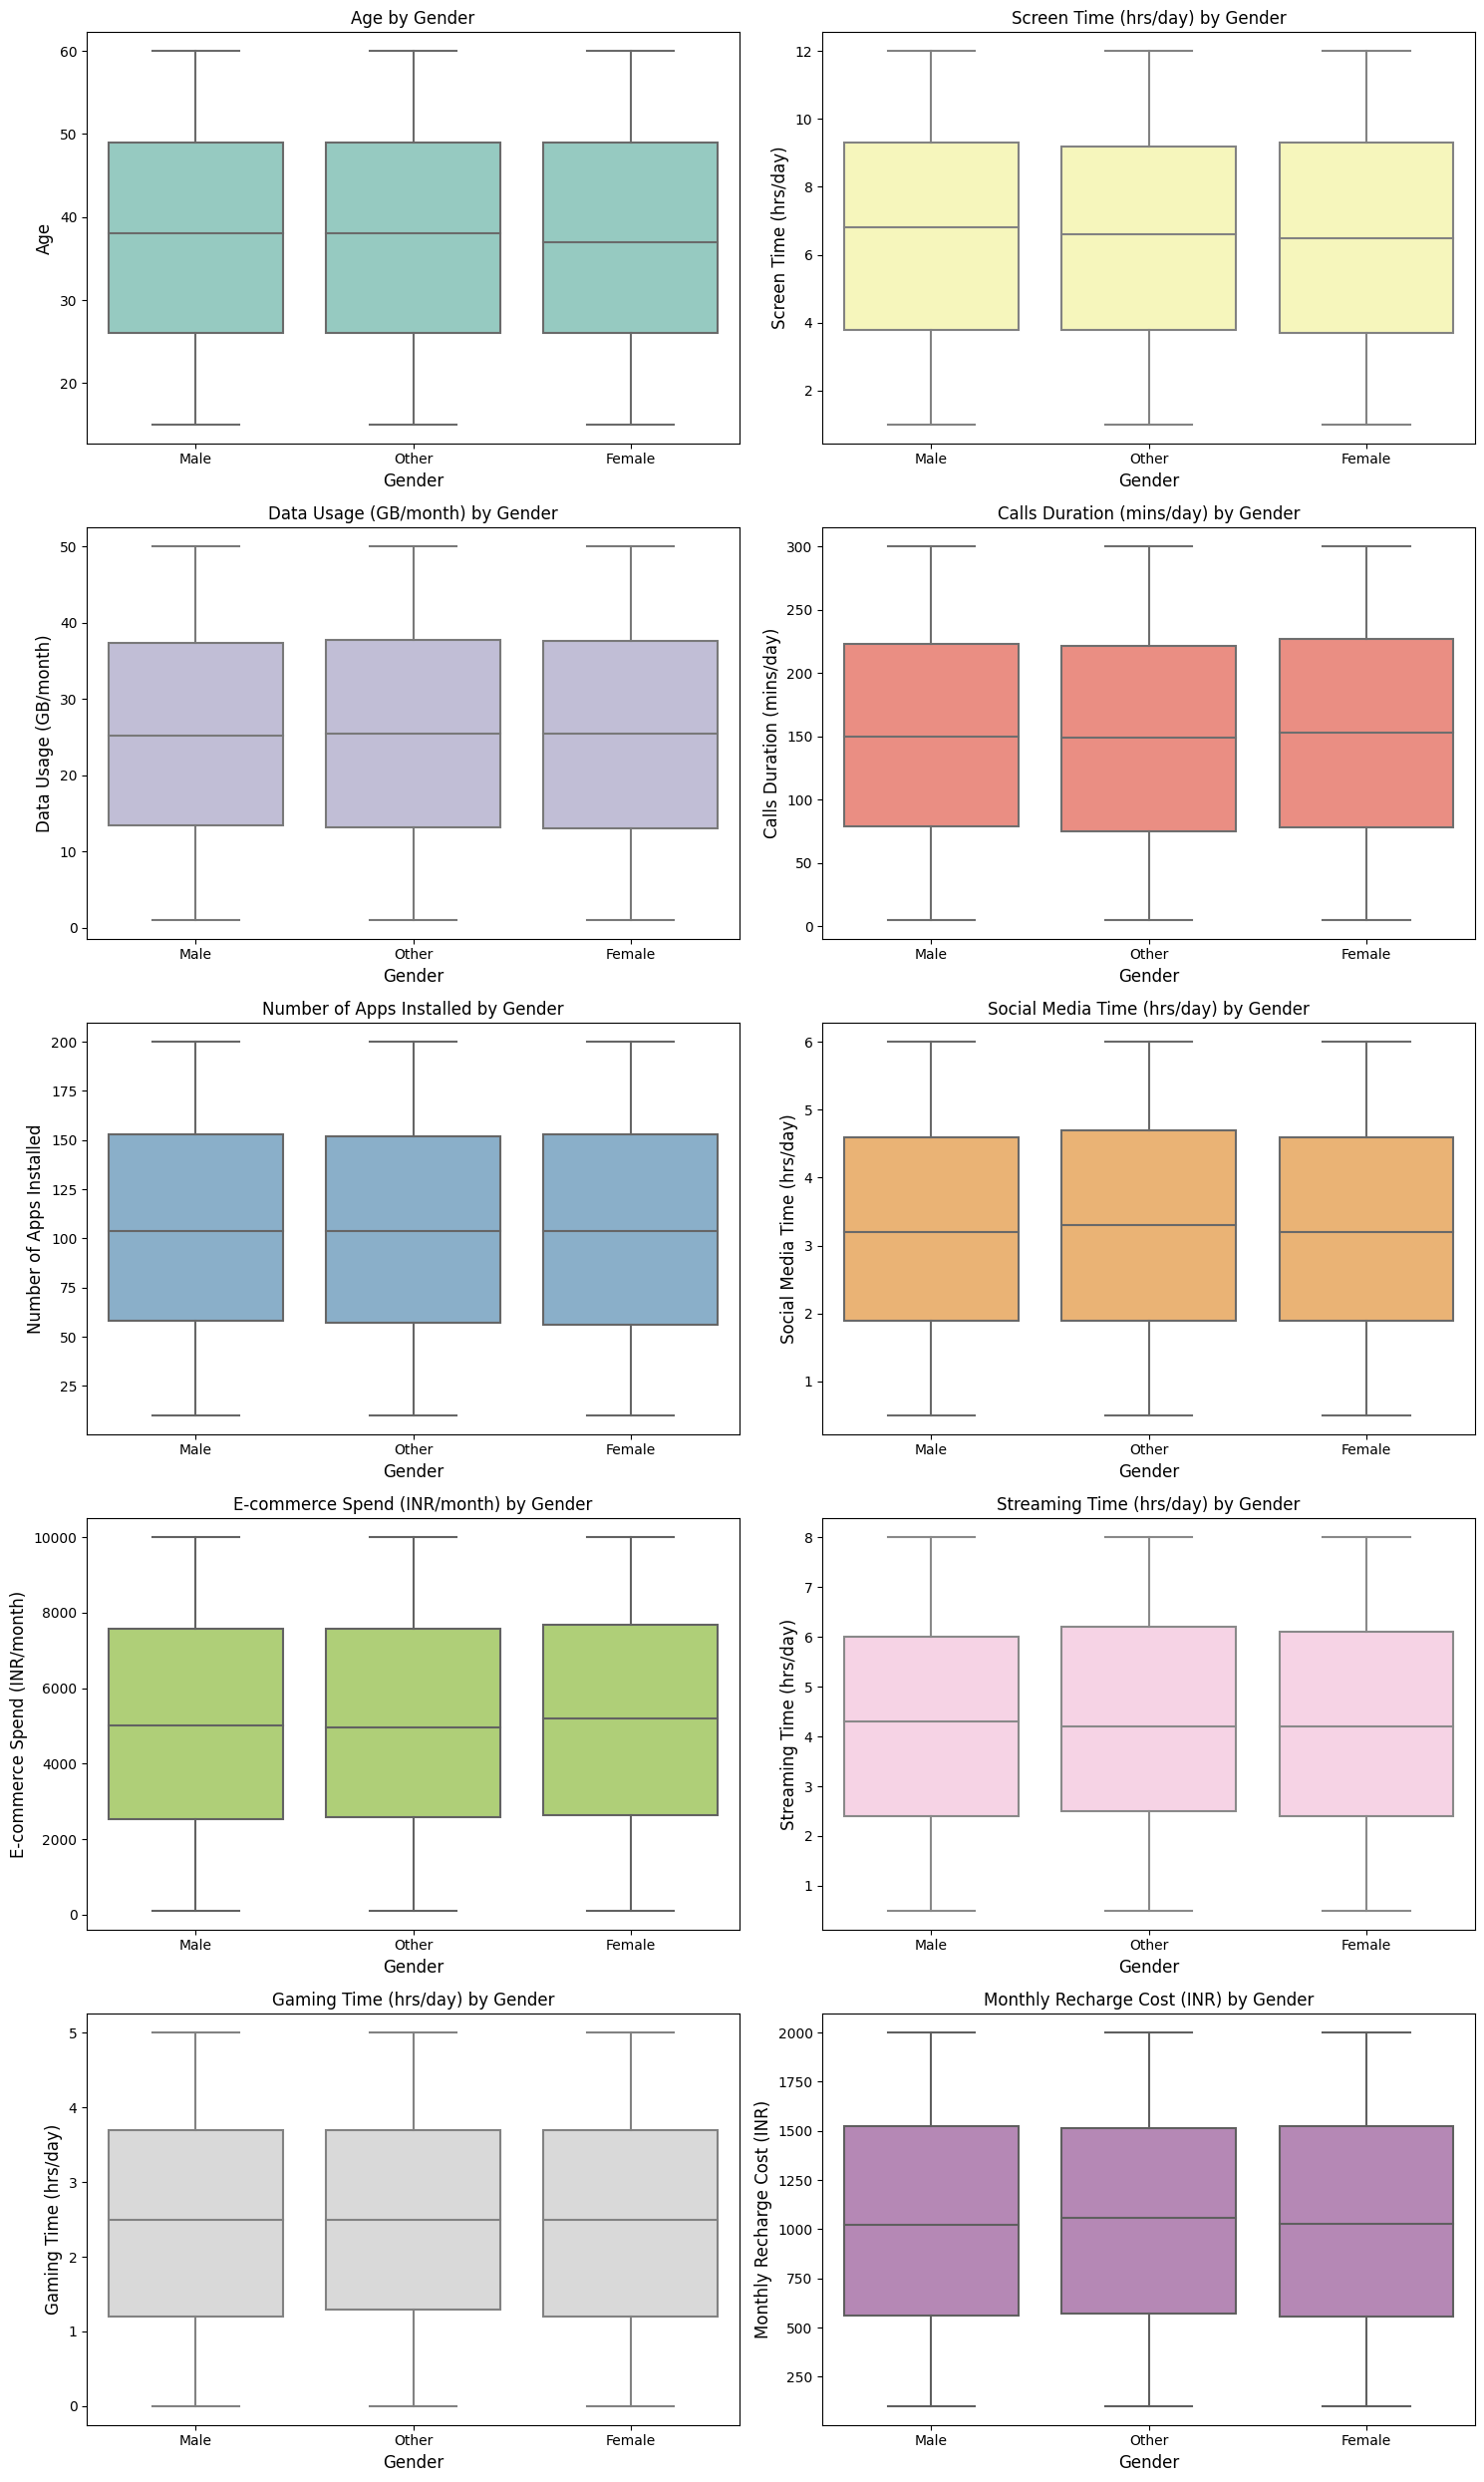

In [103]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15,25))
axes= ax.flatten()

for i, cols in enumerate(numeric_cols):
    sns.boxplot(data=df, x='Gender', y=cols,color=sns.color_palette('Set3', len(numeric_cols))[i], ax=axes[i])
    axes[i].set_title(f"{cols} by Gender")
    axes[i].set_xlabel('Gender', fontsize=12)
    axes[i].set_ylabel(cols, fontsize=12)
plt.tight_layout()    
plt.show()

# User count based on Location

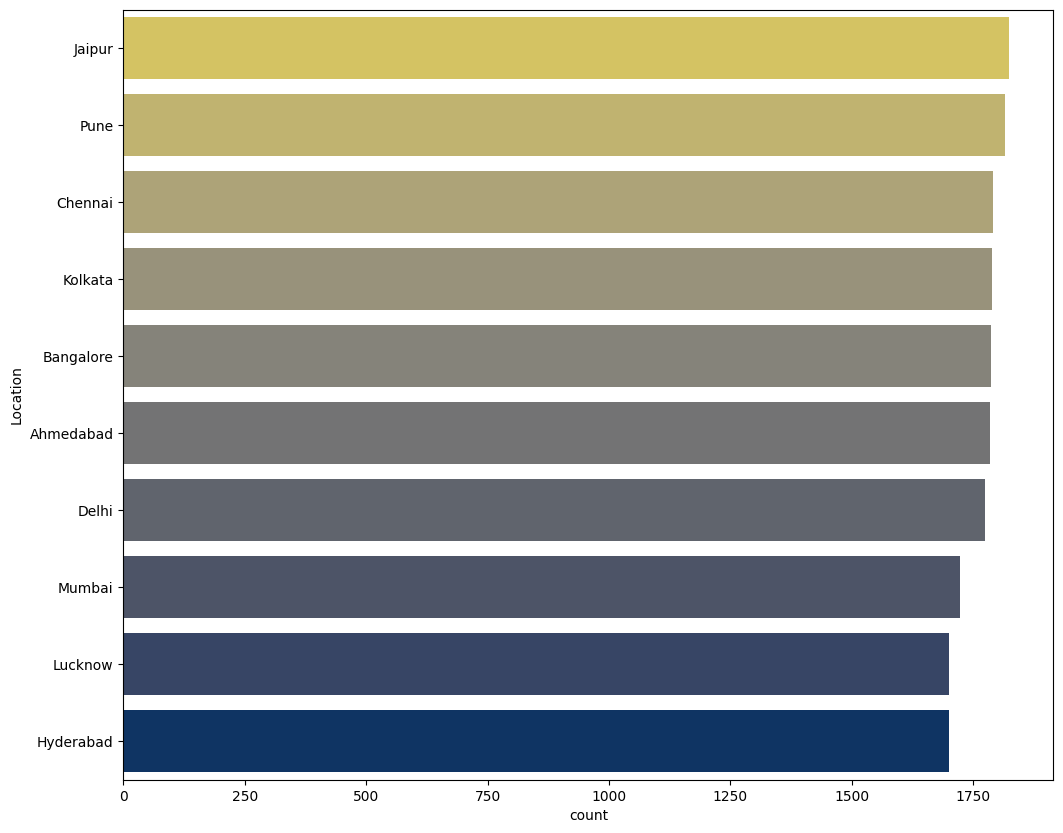

In [104]:
plt.figure(figsize=(12,10))
sns.countplot(y=df['Location'], order=df["Location"].value_counts().index, palette= "cividis_r" )
plt.show()

In [85]:
df.head()

,User ID,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use,Age_group
0,U00001,53,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education,50-65
1,U00002,60,Other,Delhi,Realme,iOS,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming,50-65
2,U00003,37,Female,Ahmedabad,Nokia,Android,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,Entertainment,36-50
3,U00004,32,Male,Pune,Samsung,Android,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,Entertainment,19-35
4,U00005,16,Male,Mumbai,Xiaomi,iOS,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,Social Media,0-18


# Average Monthly Cost by Gender, Location, Primary Use and OS

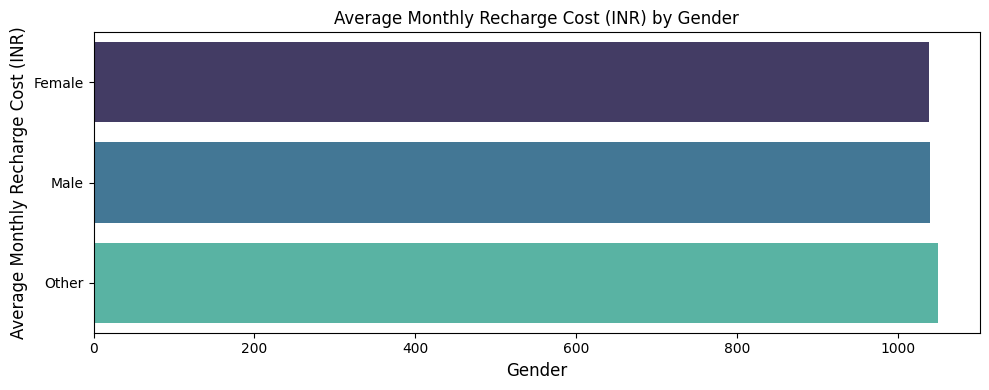

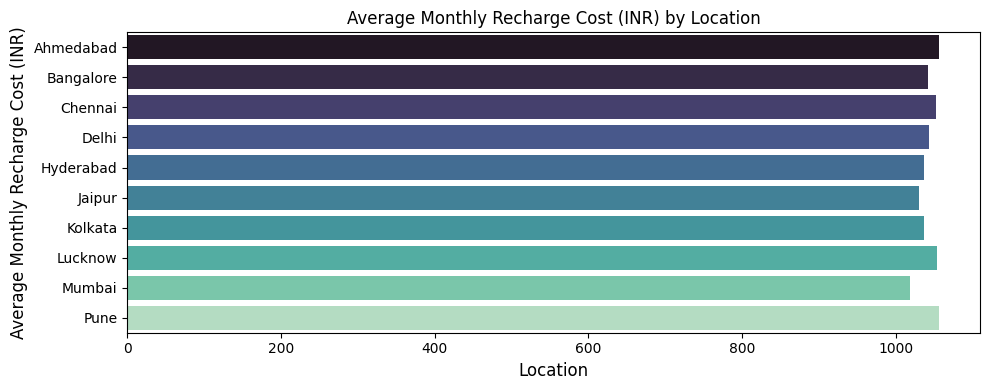

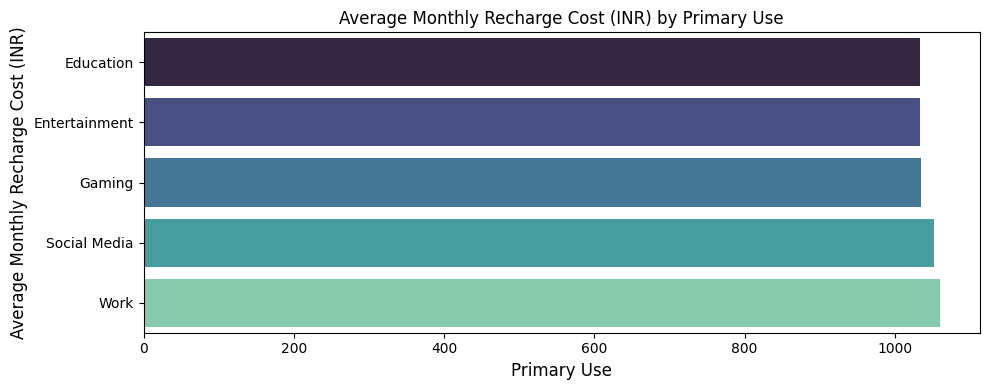

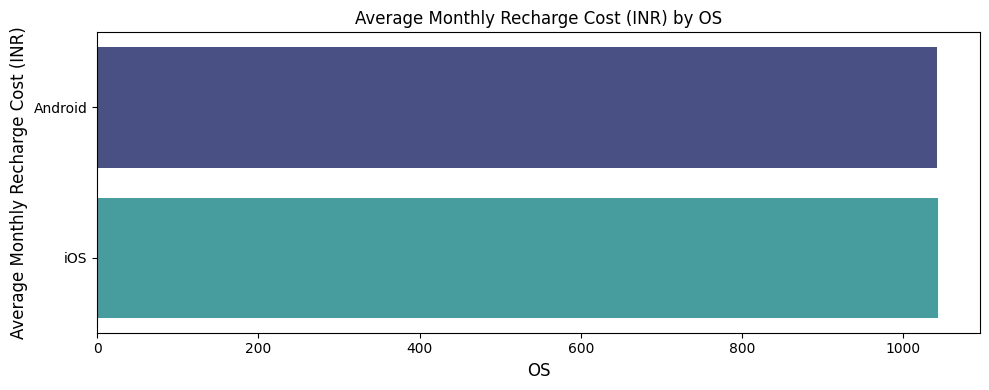

In [136]:
cat_cols = df[['Gender','Location','Primary Use', 'OS']]
for col in cat_cols:
    plt.figure(figsize=(10, 4))
    avg_value = df.groupby(col)['Monthly Recharge Cost (INR)'].mean().reset_index()                
    sns.barplot(y=col,x='Monthly Recharge Cost (INR)', data=avg_value, palette="mako")
    plt.title(f'Average Monthly Recharge Cost (INR) by {col}')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Average Monthly Recharge Cost (INR)', fontsize=12)
    plt.tight_layout()
    plt.show()


# Monthly Recharge Cost by Various Phone Brand

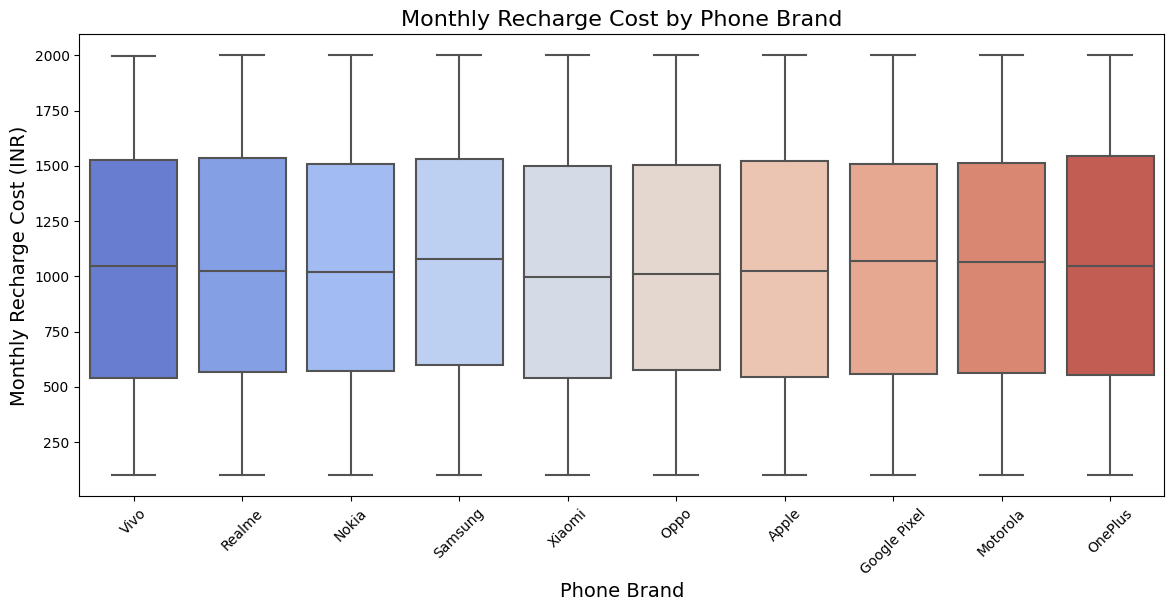

In [137]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x="Phone Brand", y="Monthly Recharge Cost (INR)", palette="coolwarm")
plt.title("Monthly Recharge Cost by Phone Brand", fontsize=16)
plt.xlabel("Phone Brand", fontsize=14)
plt.ylabel("Monthly Recharge Cost (INR)", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Data Distribution by Primary Use

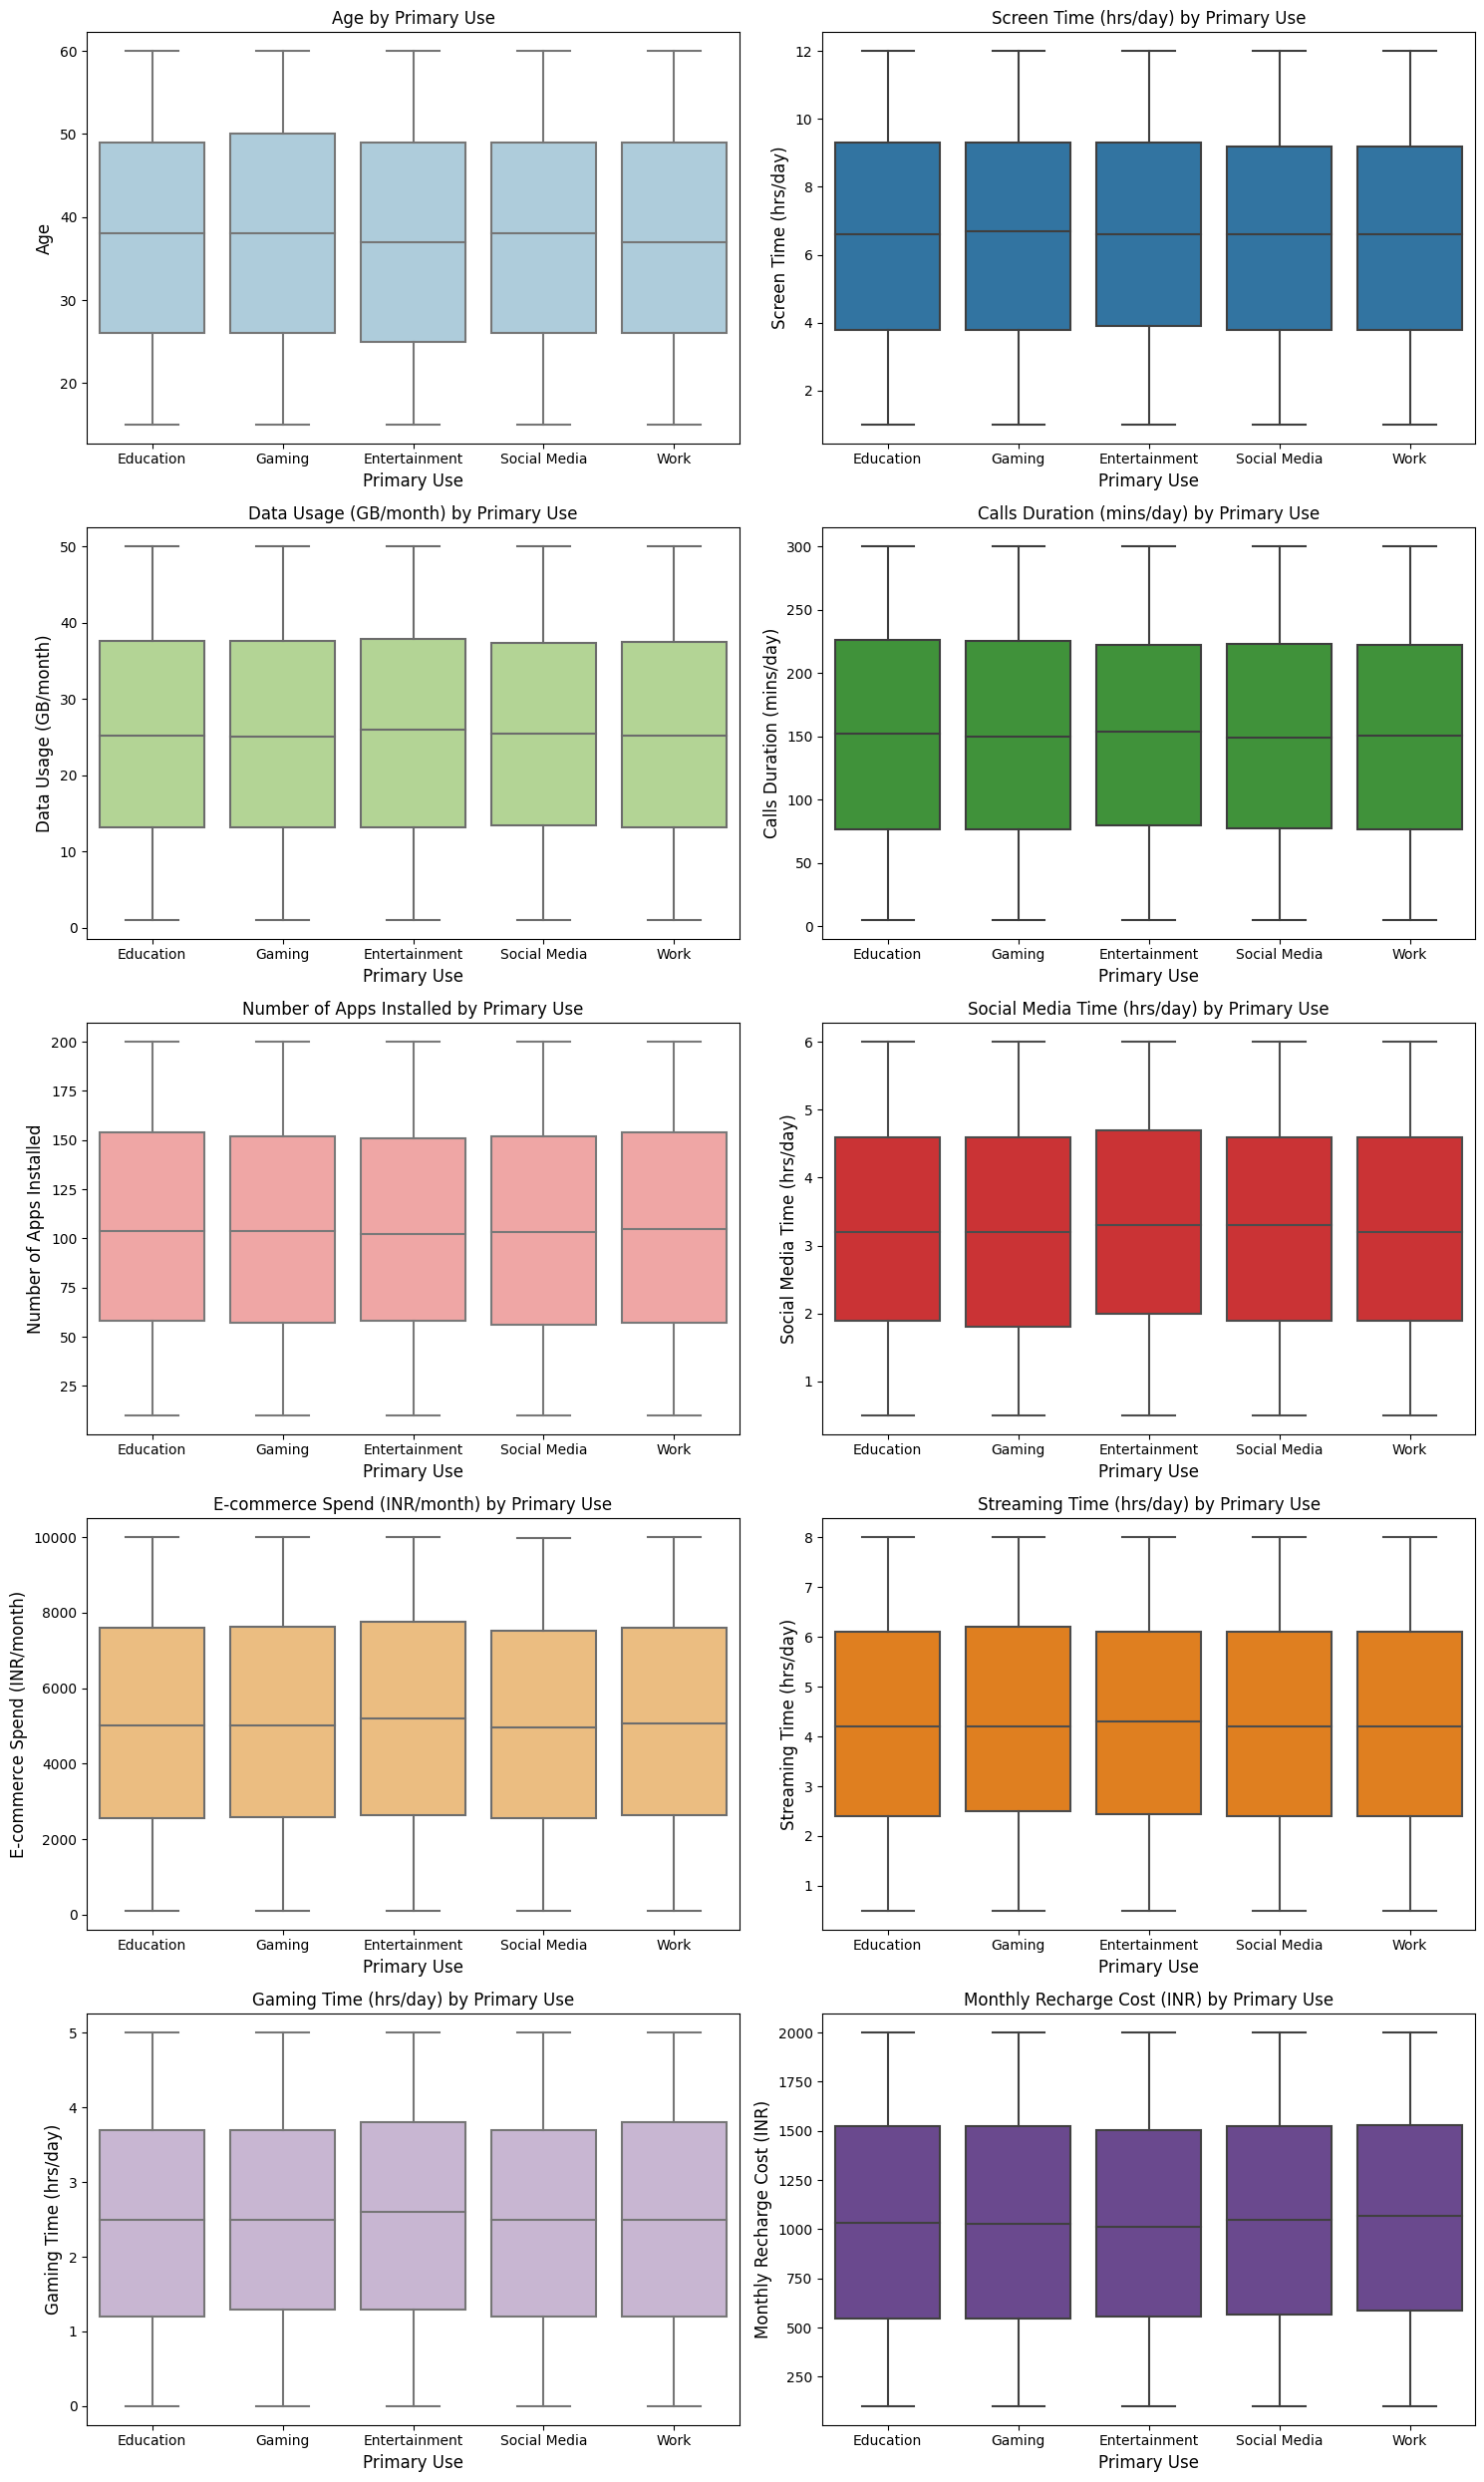

In [146]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15,25))
axes= ax.flatten()

for i, cols in enumerate(numeric_cols):
    sns.boxplot(data=df, x='Primary Use', y=cols,color=sns.color_palette('Paired', len(numeric_cols))[i], ax=axes[i])
    axes[i].set_title(f"{cols} by Primary Use")
    axes[i].set_xlabel('Primary Use', fontsize=12)
    axes[i].set_ylabel(cols, fontsize=12)
plt.tight_layout()    
plt.show()

# Number of user by Phone Brand

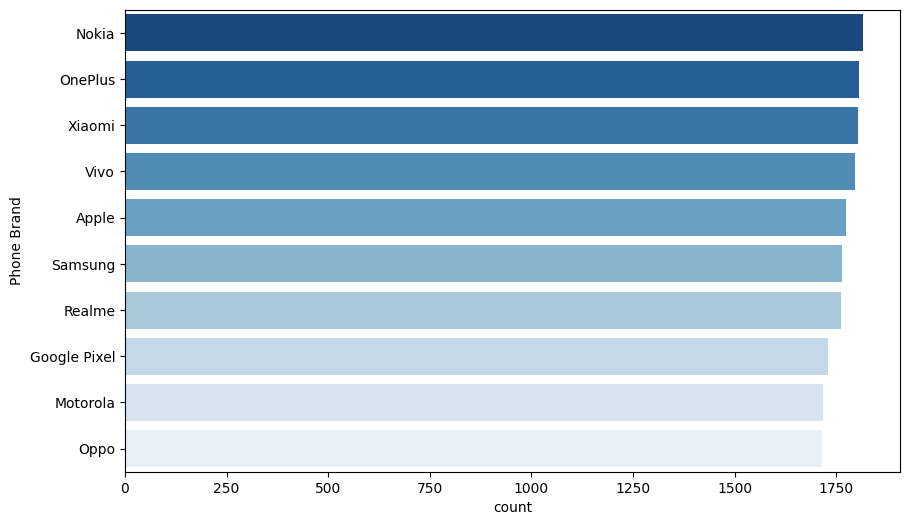

In [155]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Phone Brand',order=df['Phone Brand'].value_counts().index, palette="Blues_r")
plt.show()